# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load Datasets
orders = pd.read_csv("data/orders.csv")
customers = pd.read_csv("data/customer_profiles.csv")
products = pd.read_csv("data/products.csv")
product_orders = pd.read_csv("data/product_orders.csv")
warehouse = pd.read_csv("data/warehouse_operations.csv")

# Basic Checks
def dataset_overview(df, name):
    print(f"\n--- {name} ---")
    print(df.shape)
    print(df.dtypes)
    print(df.head())

for name, df in zip(["Orders", "Customers", "Products", "Product Orders", "Warehouse"],
                    [orders, customers, products, product_orders, warehouse]):
    dataset_overview(df, name)



--- Orders ---
(3000, 8)
order_id                   int64
customer_id                int64
order_timestamp           object
delivery_slot             object
delivery_duration_min    float64
basket_value_eur         float64
zip_code                   int64
city                      object
dtype: object
   order_id  customer_id      order_timestamp delivery_slot  \
0         1          354  2024-03-16 10:00:00   18:00-18:00   
1         2          267  2024-01-20 14:00:00   16:00-12:00   
2         3          310  2024-03-27 17:00:00   16:00-10:00   
3         4          173  2024-02-04 13:00:00    8:00-10:00   
4         5           47  2024-03-20 13:00:00   14:00-18:00   

   delivery_duration_min  basket_value_eur  zip_code       city  
0              19.257027         35.839454      1016    Utrecht  
1              24.993976         70.133103      1011    Utrecht  
2              33.183631         25.935810      1016    Utrecht  
3              40.783023         56.985427      1016 

## Customer Insights

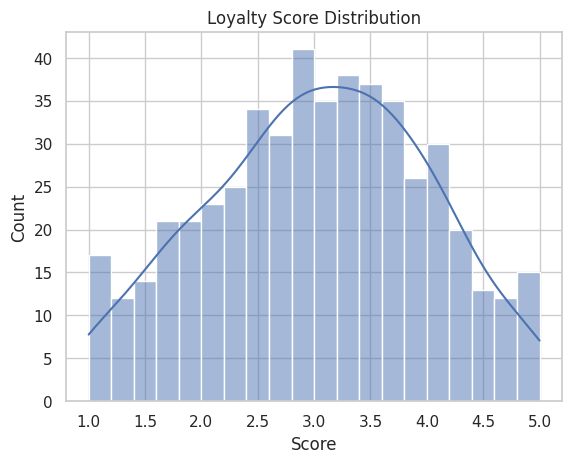

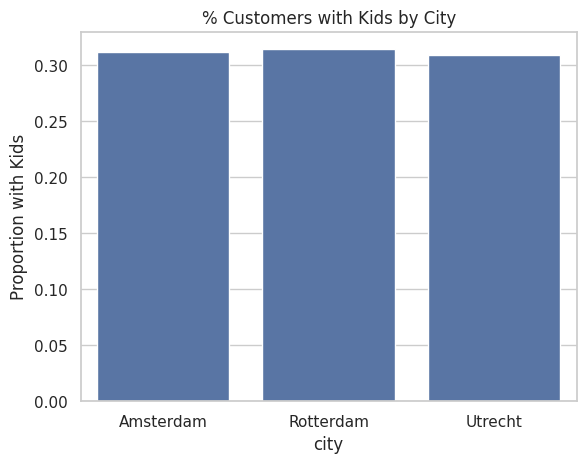

In [3]:
# Loyalty score distribution
sns.histplot(customers['loyalty_score'], bins=20, kde=True)
plt.title("Loyalty Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

# Has kids by city
has_kids_city = customers.groupby("city")["has_kids"].mean().reset_index()
sns.barplot(data=has_kids_city, x="city", y="has_kids")
plt.title("% Customers with Kids by City")
plt.ylabel("Proportion with Kids")
plt.show()


## Orders & Delivery

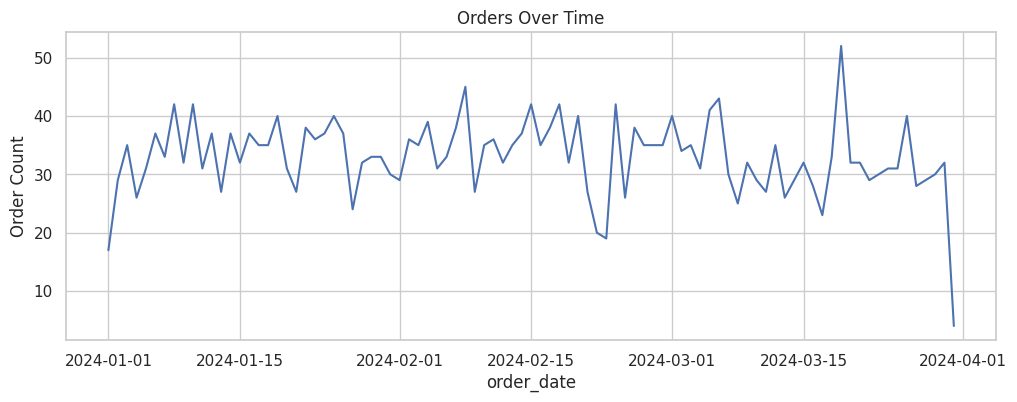

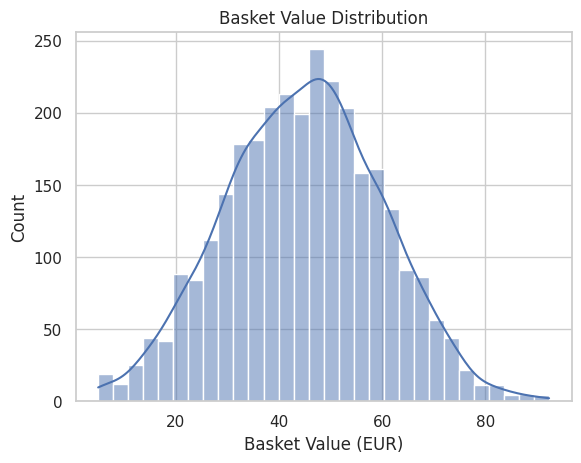

In [4]:
# Convert timestamp
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'])
orders['order_date'] = orders['order_timestamp'].dt.date

# Orders over time
orders_per_day = orders.groupby("order_date").size()
orders_per_day.plot(figsize=(12, 4), title="Orders Over Time")
plt.ylabel("Order Count")
plt.show()

# Basket value distribution
sns.histplot(orders['basket_value_eur'], bins=30, kde=True)
plt.title("Basket Value Distribution")
plt.xlabel("Basket Value (EUR)")
plt.show()



## Product Trends

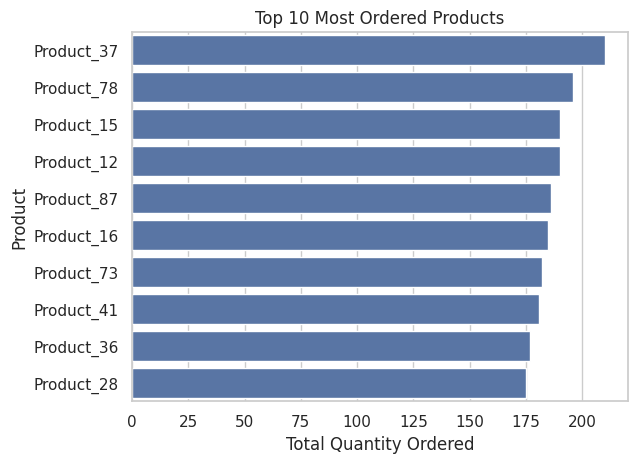

In [5]:
# Top products
top_products = product_orders.groupby("product_id")["quantity"].sum().reset_index()
top_products = top_products.merge(products, on="product_id")
top_products = top_products.sort_values("quantity", ascending=False).head(10)

sns.barplot(data=top_products, x="quantity", y="product_name")
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Product")
plt.show()



## Warehouse Operations

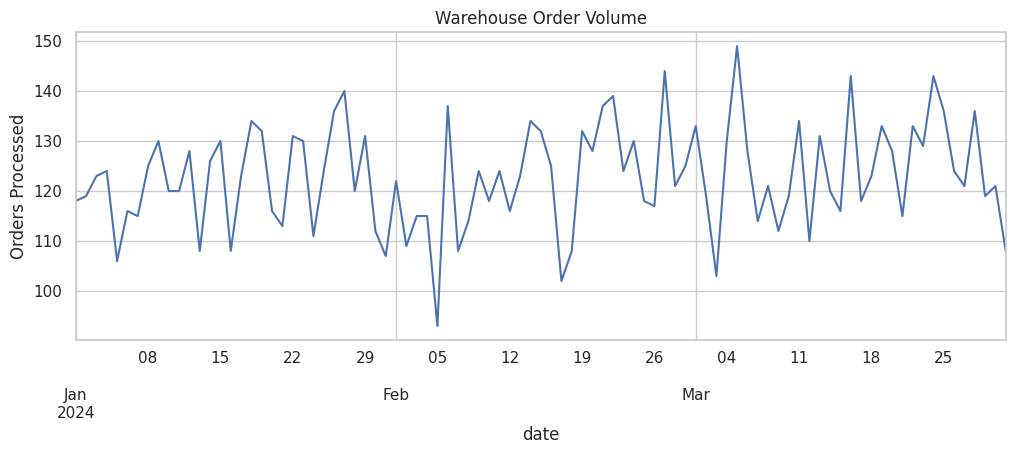

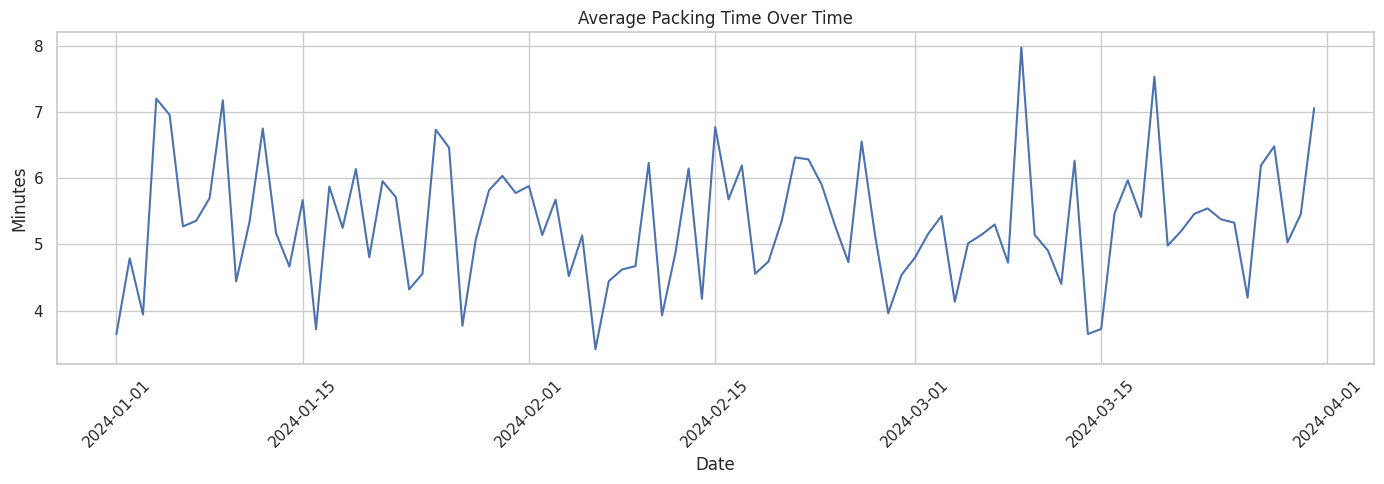

In [9]:
# Convert date
warehouse['date'] = pd.to_datetime(warehouse['date'])

# Orders processed over time
warehouse.set_index('date')['total_orders_processed'].plot(figsize=(12, 4), title="Warehouse Order Volume")
plt.ylabel("Orders Processed")
plt.show()

# Avg packing time
plt.figure(figsize=(14, 5))
sns.lineplot(data=warehouse, x="date", y="avg_packing_time_min")
plt.title("Average Packing Time Over Time")
plt.ylabel("Minutes")
plt.xlabel("Date")

# Improve x-axis formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()